<ipython-input-1-d999738d00f8>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=None, mono=True)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


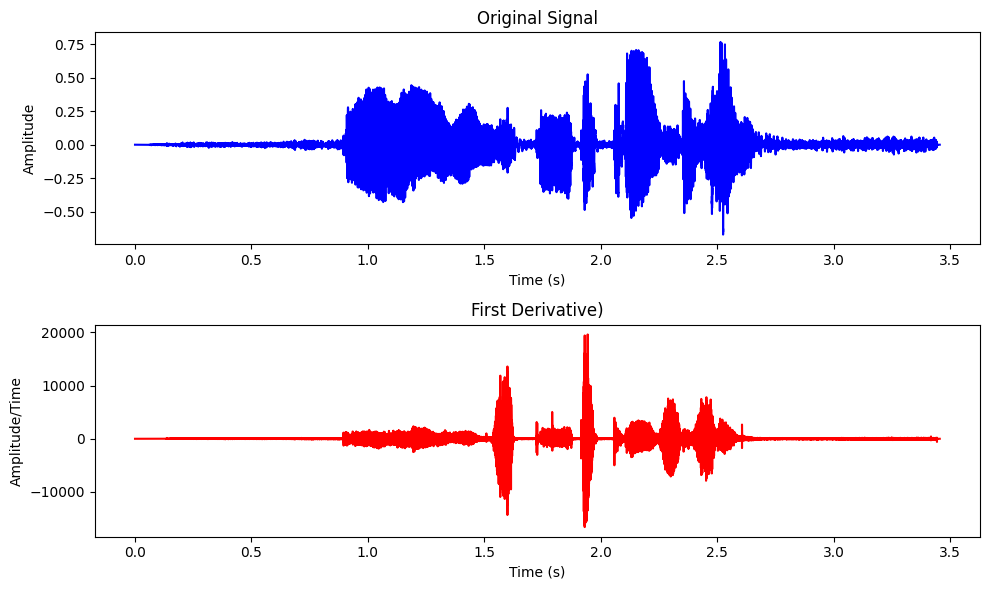

The original Signal


First derivative signal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio, display

file_path = '/content/audioai.unknown'
signal, sample_rate = librosa.load(file_path, sr=None, mono=True)
dt = 1.0 / sample_rate
derivative = np.diff(signal) / dt
derivative = np.concatenate(([derivative[0]], derivative))
time = np.arange(len(signal)) / sample_rate

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal, 'b')
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time, derivative, 'r')
plt.title('First Derivative)')
plt.xlabel('Time')
plt.ylabel('Amplitude/Time')

plt.tight_layout()
plt.show()

print("The original Signal")
display(Audio(data=signal, rate=sample_rate))


print("First derivative signal")
display(Audio(data=derivative, rate=sample_rate))

In [2]:

zero_crossings = np.where(np.diff(np.sign(derivative)))[0]
threshold = 0.15
speech_regions = []
silence_regions = []

for idx in range(len(zero_crossings) - 1):
    start_idx = zero_crossings[idx]
    end_idx = zero_crossings[idx + 1]
    segment = derivative[start_idx:end_idx]

    if np.max(segment) > threshold:
        speech_regions.append((start_idx, end_idx))
    else:
        silence_regions.append((start_idx, end_idx))

def calculate_average_length(regions):
    lengths = [end_idx - start_idx for start_idx, end_idx in regions]
    return np.mean(lengths)

average_speech_length = calculate_average_length(speech_regions)
average_silence_length = calculate_average_length(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", average_speech_length)
print("Average length between consecutive zero crossings in silence regions:", average_silence_length)

Average length between consecutive zero crossings in speech regions: 5.641008552704654
Average length between consecutive zero crossings in silence regions: 2.166501878584141
